In [1]:
# import numpy as np
# from scipy import stats
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Weights from the sklearn model
# weights_sklearn = np.array([ 0.32818329,  0.3042115,  -0.10186105,  0.08886475,  0.01572279,
#                              0.02974357,  0.03697456,  0.16798115, -0.07975405, -0.11075742,
#                              0.35627013, -0.04420661,  0.05533175, -0.14593262,  0.28784011])

# # Weights from the manual SGD model
# weights_sgd = np.array([-0.13112433,  0.43709918, -0.14427589,  0.42694235, -0.27484294,
#                         -0.23869763,  0.03894404,  0.0860894,   1.01316136,  0.18302832,
#                          0.3227861,   0.32079196,  0.38573756,  0.15655456,  0.48415392,
#                          0.07027487,  0.22941232,  0.1466708,  -0.16957565, -0.51354525,
#                         -0.9191624,  -0.39142176])

# # Ensure the arrays are of equal length
# if len(weights_sklearn) != len(weights_sgd):
#     raise ValueError("The weight arrays must be of equal length.")

# # Compute the differences
# differences = weights_sklearn[:len(weights_sgd)] - weights_sgd[:len(weights_sklearn)]

# # Check for normality using Shapiro-Wilk test
# shapiro_test = stats.shapiro(differences)
# print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

# # Visualize the differences to check for normality
# sns.histplot(differences, kde=True, color='cyan', stat='probability')
# plt.title('Histogram of Weight Differences')
# plt.show()

# stats.probplot(differences, dist="norm", plot=plt)
# plt.title('Q-Q Plot of Weight Differences')
# plt.show()

# # Select and perform the appropriate statistical test
# if shapiro_test.pvalue > 0.05:
#     # Differences are normally distributed, use paired t-test
#     t_test_result = stats.ttest_rel(weights_sklearn[:len(weights_sgd)], weights_sgd)
#     print("Paired t-test p-value:", t_test_result.pvalue)
# else:
#     # Differences are not normally distributed, use Wilcoxon Signed-Rank Test
#     wilcoxon_test_result = stats.wilcoxon(weights_sklearn[:len(weights_sgd)], weights_sgd)
#     print("Wilcoxon Signed-Rank Test p-value:", wilcoxon_test_result.pvalue)

Shapiro-Wilk Test p-value: 0.5195948522394414


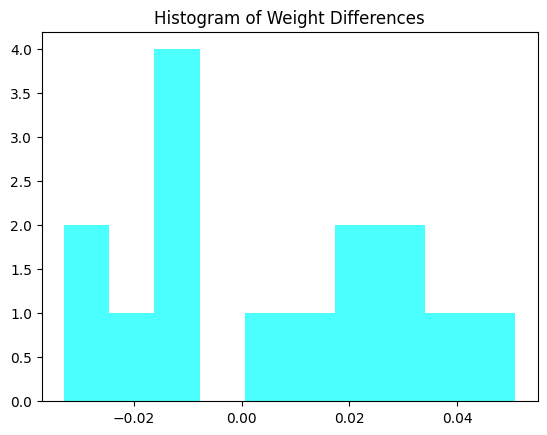

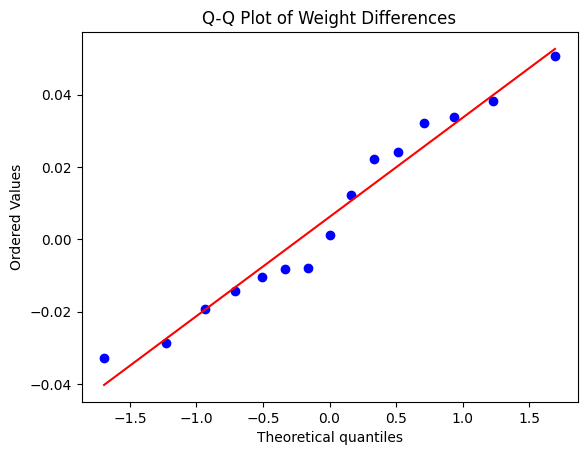

Paired t-test p-value: 0.3768286556230489


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Weights from sklearn model
weights_sklearn = np.array([ 0.30717195,  0.3890818,   0.00682342,  0.09643465, -0.02364426,  0.03989537,
   0.01428221,  0.15333123, -0.15263547, -0.08252009,  0.30619711, -0.00254252,
   0.04712896, -0.1133726,   0.28069208])

# Weights from manual SGD model
weights_sgd = np.array([ 0.31517168,  0.40336992,  0.00576785,  0.06440025, -0.00437291,  0.00601853,
 -0.03650403,  0.18199868, -0.17483306, -0.12079005,  0.28219394, -0.01466457,
  0.05536509, -0.10289066,  0.31359306])

# Compute the differences
differences = weights_sklearn - weights_sgd

# Check normality with Shapiro-Wilk test
shapiro_test = stats.shapiro(differences)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

# Plot histogram and Q-Q plot for visual inspection
plt.hist(differences, bins=10, alpha=0.7, color='cyan')
plt.title('Histogram of Weight Differences')
plt.show()

stats.probplot(differences, dist="norm", plot=plt)
plt.title('Q-Q Plot of Weight Differences')
plt.show()

# Select and perform the appropriate test based on normality
if shapiro_test.pvalue > 0.05:
    # Paired t-test
    t_test_result = stats.ttest_rel(weights_sklearn, weights_sgd)
    print("Paired t-test p-value:", t_test_result.pvalue)
else:
    # Wilcoxon Signed-Rank Test
    wilcoxon_test_result = stats.wilcoxon(differences)
    print("Wilcoxon Signed-Rank Test p-value:", wilcoxon_test_result.pvalue)


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data1 = np.array([ 0.30717195,  0.3890818,   0.00682342,  0.09643465, -0.02364426,  0.03989537,
   0.01428221,  0.15333123, -0.15263547, -0.08252009,  0.30619711, -0.00254252,
   0.04712896, -0.1133726,   0.28069208])
data2 = np.array([ 0.31517168,  0.40336992,  0.00576785,  0.06440025, -0.00437291,  0.00601853,
 -0.03650403,  0.18199868, -0.17483306, -0.12079005,  0.28219394, -0.01466457,
  0.05536509, -0.10289066,  0.31359306])

# Perform Shapiro-Wilk test
shapiro_test1 = stats.shapiro(data1)
shapiro_test2 = stats.shapiro(data2)

print("Shapiro-Wilk Test p-value for data1:", shapiro_test1.pvalue)
print("Shapiro-Wilk Test p-value for data2:", shapiro_test2.pvalue)

# Determine whether to use parametric or non-parametric tests
if shapiro_test1.pvalue > 0.05 and shapiro_test2.pvalue > 0.05:
    # Perform parametric test (e.g., independent t-test)
    t_test_result = stats.ttest_ind(data1, data2)
    print("Independent t-test p-value:", t_test_result.pvalue)
else:
    # Perform non-parametric test (e.g., Mann-Whitney U test)
    mannwhitney_test_result = stats.mannwhitneyu(data1, data2)
    print("Mann-Whitney U Test p-value:", mannwhitney_test_result.pvalue)


Shapiro-Wilk Test p-value for data1: 0.243097097863974
Shapiro-Wilk Test p-value for data2: 0.19229028505379875
Independent t-test p-value: 0.9229135248420499
